<a href="https://colab.research.google.com/github/KPchelka/telemedycyna_projekt/blob/main/projekt_telemed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

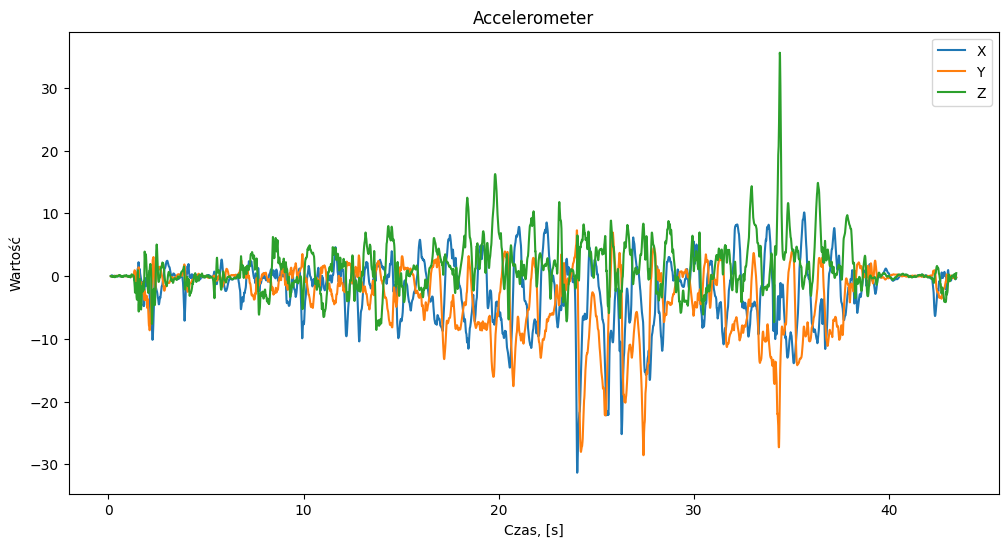

In [12]:

import csv
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt, matplotlib.patches as mpatches, matplotlib.mlab as mlab
import json
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import scipy.stats as ss


#Import the CSV files with the daily and intraday data
accelerometer_data = pd.read_csv("Accelerometer.csv")
# gravity_data = pd.read_csv('Gravity.csv')
# gyroscope_data = pd.read_csv('Gyroscope.csv')
# gyroscope_u_data = pd.read_csv('GyroscopeUncalibrated.csv')
# metadata = pd.read_csv('Metadata.csv')
# accelerometer_uncalibrated = pd.read_csv('AccelerometerUncalibrated.csv')
#total_acceleration = pd.read_csv('TotalAcceleration.csv')


accelerometer_time = accelerometer_data['time']
accelerometer_seconds_elapsed = accelerometer_data['seconds_elapsed']
accelerometer_x = accelerometer_data['x']
accelerometer_y = accelerometer_data['y']
accelerometer_z = accelerometer_data['z']

# accelerometer_u_time = accelerometer_uncalibrated['time']
# accelerometer_u_seconds_elapsed = accelerometer_uncalibrated['seconds_elapsed']
# accelerometer_u_x = accelerometer_uncalibrated['x']
# accelerometer_u_y = accelerometer_uncalibrated['y']
# accelerometer_u_z = accelerometer_uncalibrated['z']

# gravity_time = gravity_data['time']
# gravity_seconds_elapsed = gravity_data['seconds_elapsed']
# gravity_x = gravity_data['x']
# gravity_y = gravity_data['y']
# gravity_z = gravity_data['z']

# gyroscope_time = gyroscope_data['time']
# gyroscope_seconds_elapsed = gyroscope_data['seconds_elapsed']
# gyroscope_x = gyroscope_data['x']
# gyroscope_y = gyroscope_data['y']
# gyroscope_z = gyroscope_data['z']

# gyroscope_u_time = gyroscope_u_data['time']
# gyroscope_u_seconds_elapsed = gyroscope_u_data['seconds_elapsed']
# gyroscope_u_x = gyroscope_u_data['x']
# gyroscope_u_y = gyroscope_u_data['y']
# gyroscope_u_z = gyroscope_u_data['z']

#total_acceleration_time = total_acceleration['time']
#total_acceleration_seconds_elapsed = total_acceleration['seconds_elapsed']
#total_acceleration_x = total_acceleration['x']
#total_acceleration_y = total_acceleration['y']
#total_acceleration_z = total_acceleration['z']


#accelerometer
plt.figure(figsize=(12, 6))

plt.plot(accelerometer_seconds_elapsed, accelerometer_x, label='X')
plt.plot(accelerometer_seconds_elapsed, accelerometer_y, label='Y')
plt.plot(accelerometer_seconds_elapsed, accelerometer_z, label='Z')

plt.title('Accelerometer')
plt.xlabel('Czas, [s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

# #Accelerometer Uncalibrated
# plt.figure(figsize=(12, 6))

# plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_x, label='X')
# plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_y, label='Y')
# plt.plot(accelerometer_u_seconds_elapsed, accelerometer_u_z, label='Z')

# plt.title('Accelerometer Uncalibrated')
# plt.xlabel('Czas, [s]')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()

# #Gravity
# plt.figure(figsize=(12, 6))

# plt.plot(gravity_seconds_elapsed, gravity_x, label='X')
# plt.plot(gravity_seconds_elapsed, gravity_y, label='Y')
# plt.plot(gravity_seconds_elapsed, gravity_z, label='Z')

# plt.title('Gravity')
# plt.xlabel('Czas, [s]')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()

# #Gyroscope
# plt.figure(figsize=(12, 6))

# plt.plot(gyroscope_seconds_elapsed, gyroscope_x, label='X')
# plt.plot(gyroscope_seconds_elapsed, gyroscope_y, label='Y')
# plt.plot(gyroscope_seconds_elapsed, gyroscope_z, label='Z')

# plt.title('Gyroscope')
# plt.xlabel('Czas, [s]')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()

# #Gyroscope Uncalibrated
# plt.figure(figsize=(12, 6))

# plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_x, label='X')
# plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_y, label='Y')
# plt.plot(gyroscope_u_seconds_elapsed, gyroscope_u_z, label='Z')

# plt.title('Gyroscope Uncalibrated')
# plt.xlabel('Czas, [s]')
# plt.ylabel('Wartość')
# plt.legend()
# plt.show()

#Total Acceleration
#plt.figure(figsize=(12, 6))

#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_x, label='X')
#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_y, label='Y')
#plt.plot(total_acceleration_seconds_elapsed, total_acceleration_z, label='Z')

#plt.title('Total Acceleration')
#plt.xlabel('Czas, [s]')
#plt.ylabel('Wartość')
#plt.legend()
#plt.show()




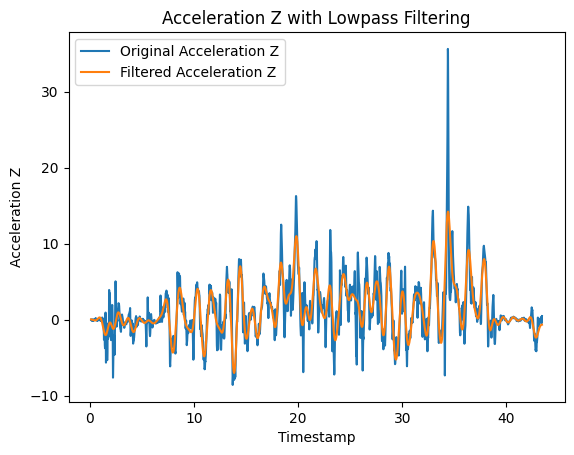

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt



# Parametry filtru dolnoprzepustowego
cutoff_frequency = 5  # częstotliwość odcięcia w Hz
sampling_rate = 100  # częstotliwość próbkowania w Hz

# Projektowanie filtru dolnoprzepustowego (filtrowanie Butterworth)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 2 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Filtracja sygnału
filtered_acceleration_z = butter_lowpass_filter(accelerometer_z, cutoff_frequency, sampling_rate)

# Wyświetlenie wykresu oryginalnego sygnału i sygnału po filtracji
plt.plot(accelerometer_seconds_elapsed, accelerometer_z, label='Original Acceleration Z')
plt.plot(accelerometer_seconds_elapsed, filtered_acceleration_z, label='Filtered Acceleration Z')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration Z')
plt.title('Acceleration Z with Lowpass Filtering')
plt.legend()
plt.show()

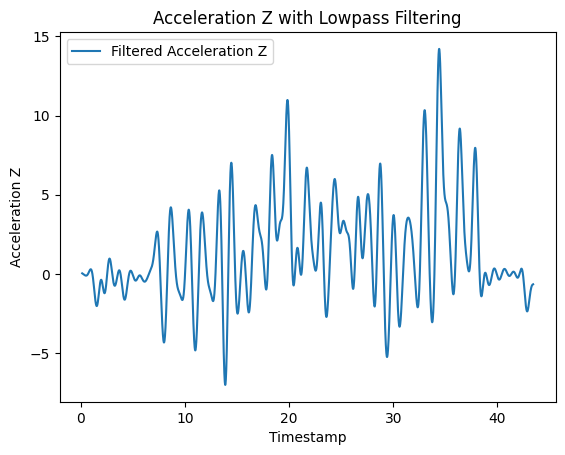

In [14]:
plt.plot(accelerometer_seconds_elapsed, filtered_acceleration_z, label='Filtered Acceleration Z')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration Z')
plt.title('Acceleration Z with Lowpass Filtering')
plt.legend()
plt.show()

[ 0.03420934  0.03004919  0.02579148 ... -0.66371095 -0.66063566
 -0.65815184]


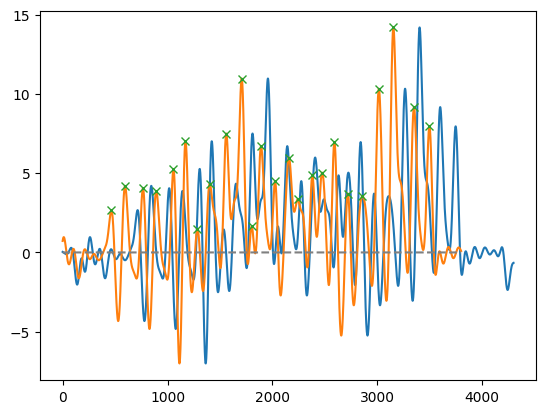

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = filtered_acceleration_z
print(x)
shiftex = x[250:-250]
peaks, _ = find_peaks(shiftex, height=1)
plt.plot(x)
plt.plot(shiftex)
plt.plot(peaks, shiftex[peaks], "x")
plt.plot(np.zeros_like(shiftex), "--", color="gray")
plt.show()

In [16]:
for i in range(0, len(peaks)):
    print(peaks[i], x[peaks[i]])
result = accelerometer_seconds_elapsed[peaks[len(peaks)-1]] - accelerometer_seconds_elapsed[peaks[0]]
result_rounded = round(result, 1)
print(result_rounded)

print("Czas wykonywania ćwiczenia w sekundach: ", result_rounded, "sekund")

465 0.19220875164012224
595 -0.492819548988756
766 -3.5186493839134703
892 0.03146375245759282
1056 -2.34757957675984
1171 1.7858737534350027
1285 2.6811739791065516
1402 3.7219968431301234
1560 -0.21795691373461387
1707 2.2210459989766327
1802 7.063017891168447
1891 3.328852663317129
2025 -0.26587843388122123
2157 5.553271361530375
2240 0.8324471332760637
2380 3.7431063158886064
2474 2.9885681663646833
2590 -0.6256269386981886
2718 4.940018141775431
2858 4.599829607581444
3014 -2.7572539933602127
3153 1.6653142203027962
3349 -1.9522038938880484
3496 3.0435010777438145
30.5
Czas wykonywania ćwiczenia w sekundach:  30.5 sekund


In [17]:
lower_bound = -1.5
upper_bound = 1.5

# Ustaw czas trwania, aby uznać dane jako pasujące
required_duration = 5  # sekundy

# Zainicjuj zmienną do przechowywania ostatniej wartości x i odpowiadającego czasu
last_valid_value = None
time_s_of_last_valid_value = None
time_of_last_valid_value = None

# Iteruj przez indeksy danych
for idx in range(len(accelerometer_data)):
    time_s = accelerometer_data['seconds_elapsed'].iloc[idx]
    z_value = accelerometer_data['z'].iloc[idx]
    time = accelerometer_data['time'].iloc[idx] / 10**9

    date_time = datetime.fromtimestamp(time)

    # Sprawdź, czy wartość x spełnia warunek
    if lower_bound <= z_value <= upper_bound:
        # Aktualizuj ostatnią ważną wartość x i czas
        last_valid_value = z_value
        time_s_of_last_valid_value = time_s
        time_of_last_valid_value = date_time

        # Sprawdź, czy wartość x utrzymuje się w granicach przez wymaganą liczbę sekund
        if idx >= required_duration:  # Sprawdzamy czy mamy wystarczającą ilość pomiarów
            break  # Jeśli tak, możemy przerwać iterację

# Jeśli ostatnia ważna wartość została znaleziona, wydrukuj ją wraz z odpowiadającym czasem
if last_valid_value is not None and time_s_of_last_valid_value is not None:
    poczatek_treningu = last_valid_value
    czas_s_poczatku_treningu = time_s_of_last_valid_value
    czas_poczatku_treningu = time_of_last_valid_value

    print("Znaleziono ostatnią wartość x w granicach od -1.5 do 1.5 przez co najmniej 5 sekund: ", poczatek_treningu, "s")
    print("Czas odpowiadający tej wartości:", czas_s_poczatku_treningu)
    print("Godzina rozpoczęcia treningu", czas_poczatku_treningu)
else:
    print("Nie znaleziono odpowiedniej wartości z")


Znaleziono ostatnią wartość x w granicach od -1.5 do 1.5 przez co najmniej 5 sekund:  -0.1053686141967773 s
Czas odpowiadający tej wartości: 0.17384521484375
Godzina rozpoczęcia treningu 2024-05-06 21:11:32.753845


jezeli wartosc x nie jest wieksza od danego zakresu to nic nie robimy

jezeli wartosc jest poza oraz w srodku zakresu to jezeli te wartosci wahaja się przez wiecej niz 3 sekundy to zaczynamy pomiar - 3 sekundy  

In [27]:
from datetime import datetime

# Wartość timestamp w nanosekundach
timestamp = accelerometer_time[0]

# Dodanie 2 godzin (7200 sekund) do wartości timestamp
timestamp += 7200 * 10**9  # Zamiana godzin na sekundy, a następnie na nanosekundy

# Przekształcenie timestamp na datę i czas
date_time = datetime.fromtimestamp(timestamp / 10**9)  # Konwersja z powrotem na sekundy

# Wyświetlenie przekształconej daty i czasu
print("Przekształcona data i czas:", date_time)

Przekształcona data i czas: 2024-05-06 23:11:32.703752


In [31]:
csv_path = f"{user_data['name']}_workouts.csv"

# Zapisanie danych treningowych do pliku CSV
with open(csv_path, "a", newline="") as file:
    # Uzyskanie aktualnej pozycji wskaźnika pliku
    file.seek(0, 2)  # Przesuń wskaźnik do końca pliku
    num_rows = file.tell()  # Zwróć pozycję wskaźnika (długość pliku w bajtach)
    if num_rows == 0:
        # Plik jest pusty, więc zaczynamy od pierwszego wiersza
        exercise = 1
    else:
        # Plik ma dane, więc liczba wierszy to pozycja wskaźnika podzielona przez długość jednego wiersza
        # Zakładamy, że jedna linia ma długość 10 bajtów, możesz dostosować to do rzeczywistej długości wiersza w swoim pliku CSV
        row_length = 10  # Długość przykładowego wiersza
        num_rows = num_rows // row_length
        exercise = num_rows + 1

    writer = csv.writer(file)
    writer.writerow([exercise, date_time, result_rounded])


df = pd.read_csv(csv_path, header=None)
print(df)

   0                           1     2
0  1  2024-05-06 23:11:32.703752  30.5
1  4  2024-05-06 23:11:32.703752  30.5
2  8  2024-05-06 23:11:32.703752  30.5


In [ ]:
# Function to get user data
def get_user_data():
    name = input("Wprowadź swoje imię: ")
    age = input(f"{name}, wprowadź swój wiek: ")
    weight = float(input(f"{name}, podaj swoją wagę (kg): "))
    height = float(input(f"{name}, podaj swój wzrost (cm): "))
    return {"name": name, "age": age, "weight": weight, "height": height,}


# Function to save user data to JSON file
def save_user_data(data):
    with open('user_data.json', 'w') as f:
        json.dump(data, f)

# Function to load user data from JSON file
def load_user_data():
    with open('user_data.json') as f:
        return json.load(f)

def center():

    print("Czy dane treningu zostały załadowane?")
    choices = input(" ")
    if choices == "tak":
      print("\n\n")
    elif choices == "nie":
        print("Aby załadować dane:\n1. Pobierz aplikację Sensor Logger.")
        print("2. Uruchom aplikację i upewnij się, że akcelerometr jest włączony. Możesz to zrobić poprzez wybranie odpowiedniej opcji w ustawieniach aplikacji.")
        print("3. Rozpocznij nagrywanie danych, naciskając przycisk Start Recording. Po rozpoczęciu nagrywania, odczekaj 5 sekund nieruchomo. Następnie wykonaj trening rehabilitacyjny.")
        print("4. Po zakończeniu treningu zaczekaj kolejne 5 sekund, pozostając nieruchomo, następnie zatrzymaj nagrywanie przyciskiem Stop Recording.")
        print("5. Przejdź do sekcji Recordings w aplikacji, a następnie otwórz ostatnie nagranie. W menu eksportu, wybierz opcję Export as CSV in Zip File.")
        print("6. Załaduj wygenerowany plik zip zawierający nagranie w formacie CSV do środowiska Colab")
        center()
    else:
      print("Nieprawidłowy wybór. Proszę spróbuj ponownie.")

# Function to prompt user to log in or sign up
def login_or_signup():
    choice = input("Wybierz 1, aby zalogować się, lub 2, aby się zarejestrować: ")
    if choice == "1":
        # Log in
        while True:
            try:
                user_data = load_user_data()
            except FileNotFoundError:
                print("Brak danych użytkownika. Proszę najpierw się zarejestrować.")
                return login_or_signup()
            name = input("Wprowadź swoje imię: ")
            age = input(f"{name}, wprowadź swój wiek: ")
            if name == user_data['name'] and age == user_data['age']:
                print("Logowanie udane!")
                center()
                return user_data
            else:
                print("Logowanie nieudane. Proszę spróbować ponownie.")
    elif choice == "2":
        # Sign up
        user_data = get_user_data()
        save_user_data(user_data)
        print("Rejestracja zakończona pomyślnie!")
        center()
        return user_data
    else:
        print("Nieprawidłowy wybór. Proszę spróbować ponownie.")
        return login_or_signup()

# Get user data
user_data = login_or_signup()

# # Create a function to log a workout session
# def log_workout(user_data):
#     # Get today's date
#     date = datetime.today().strftime("%Y-%m-%d")

#     # Ask the user for workout details
#     exercise = input("Podaj nazwę ćwiczenia: ")
#     sets = int(input("Podaj ilość podejść: "))
#     reps = int(input("Podaj liczbę powtórzeń w podejściu: "))
#     duration = float(input("Podaj czas trwania ćwiczenia (w minutach): "))
#     calories_burned = float(input("Podaj liczbę kalorii spalonych podczas ćwiczenia: "))

#     # Save the workout data to a CSV file
#     with open(f"{user_data['name']}_workouts.csv", "a", newline="") as file:
#         writer = csv.writer(file)
#         writer.writerow([date, exercise, sets, reps, duration, calories_burned])

#     print("Trening został zarejestrowany pomyślnie!")

# Create a function to generate monthly workout summary chart
# def generate_monthly_workout_summary_chart(user_data):
#     # Prompt user for the month
#     month = input("Podaj miesiąc, dla którego chcesz wygenerować zestawienie treningów (format: mm-rrrr): ")

#     # Create a dictionary to store monthly workout data
#     monthly_data = defaultdict(float)

#     # Read the workout data from the CSV file for the given month
#     with open(f"{user_data['name']}_workouts.csv", "r") as file:
#         reader = csv.reader(file)
#         next(reader)  # Skip the header row
#         for row in reader:
#             date = row[0]
#             if date.endswith(month):
#                 duration = float(row[4])
#                 monthly_data[date[0:10]] += duration

#     # Generate the workout chart
#     fig, ax = plt.subplots(figsize=(10, 10))
#     ax.plot(list(monthly_data.keys()), list(monthly_data.values()))
#     ax.set_xlabel("Date")
#     ax.set_ylabel("Total Workout Duration (minutes)")
#     ax.set_title(f"{month} Workout Summary")

#     plt.show()


# Create a function to generate a pie chart of the most common exercises
def generate_exercise_chart(user_data):
    # Create a dictionary to store exercise data
    exercise_data = defaultdict(int)

    # Read the workout data from the CSV file
    with open(f"{user_data['name']}_workouts.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            exercise = row[1]
            exercise_data[exercise] += 1

            # Generate the chart
    labels = list(exercise_data.keys())
    values = list(exercise_data.values())
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title("Most Common Exercises")
    plt.show()


# Create a function to generate a bar chart of the total calories burned
def generate_calories_chart(user_data):
    # Prompt user for the month
    month = input("Podaj miesiąc, dla którego chcesz wygenerować zestawienie treningów (format: mm-rrrr): ")

    # Create a dictionary to store monthly calorie data
    monthly_calories = defaultdict(float)

    # Read the workout data from the CSV file
    with open(f"{user_data['name']}_workouts.csv", "r") as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            date = row[0]
            if date.endswith(month):
                calories = float(row[5])
                monthly_calories[date[0:7]] += calories


    # Generate the chart
    x_values = list(monthly_calories.keys())
    y_values = list(monthly_calories.values())
    plt.bar(x_values, y_values)
    plt.xlabel("Month")
    plt.ylabel("Total Calories Burned")
    plt.title("Monthly Calories Burned Summary")
    plt.show()




# Main program loop
while True:
    print("\n----Rejestrator czasu cwiczeń rehabilitacyjnych----")
    print("1. Wygeneruj wykres treningu rehabilitacyjnrgo")
    print("2. Wyświetlij czas wykonywania treningu w sekundach")
    print("3. Wyświetlij datę wykonywania treningu")
    print("4. Wyświetlij listę treningów")
    print("5. Wyjdź")
    choice = input("Wpisz swój wybór (1-5): ")

    if choice == "1":
        # Wyświetlenie wykresu oryginalnego sygnału i sygnału po filtracji
        plt.plot(accelerometer_seconds_elapsed, accelerometer_z, label='Rzeczywisty sygnał akcelerometru')
        plt.plot(accelerometer_seconds_elapsed, filtered_acceleration_z, label='Sygnał akcelerometru po filtracji')
        plt.xlabel('Czas')
        plt.ylabel('Wartość akcelerometru')
        plt.title('Wykres treningu rehabilitacyjnrgo')
        plt.legend()
        plt.show()

    elif choice == "2":
        print("Czas wykonywania ćwiczenia w sekundach: ", result_rounded, "sekund")
    elif choice == "3":
        print("data i czas:", date_time)
    elif choice == "4":
        df = pd.read_csv(csv_path, header=None)
        print(df)
    elif choice == "5":
        print("Do widzenia!")
        break
    else:
        print("Nieprawidłowy wybór. Proszę spróbuj ponownie.")

Wybierz 1, aby zalogować się, lub 2, aby się zarejestrować: 1
Wprowadź swoje imię: Polina
Polina, wprowadź swój wiek: 21
Logowanie udane!
Czy dane treningu zostały załadowane?
 nie
Aby załadować dane:
1. Pobierz aplikację Sensor Logger.
2. Uruchom aplikację i upewnij się, że akcelerometr jest włączony. Możesz to zrobić poprzez wybranie odpowiedniej opcji w ustawieniach aplikacji.
3. Rozpocznij nagrywanie danych, naciskając przycisk Start Recording. Po rozpoczęciu nagrywania, odczekaj 5 sekund nieruchomo. Następnie wykonaj trening rehabilitacyjny.
4. Po zakończeniu treningu zaczekaj kolejne 5 sekund, pozostając nieruchomo, następnie zatrzymaj nagrywanie przyciskiem Stop Recording.
5. Przejdź do sekcji Recordings w aplikacji, a następnie otwórz ostatnie nagranie. W menu eksportu, wybierz opcję Export as CSV in Zip File.
6. Załaduj wygenerowany plik zip zawierający nagranie w formacie CSV do środowiska Colab
Czy dane treningu zostały załadowane?
 tak




----Rejestrator czasu cwiczeń reha